In [571]:
#Importing General Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math, time, random, datetime
import warnings
warnings.filterwarnings("ignore")

In [572]:
# Import the data to a dataframe
reviews_df = pd.read_csv("C:/Users/saivi/Documents/ML streaming data/Hotel_Reviews_new.csv",usecols=range(0, 20),header=None)
reviews_df.columns = ['Hotel_Address','Additional_Number_of_Scoring','Review_Date','Average_Score','Hotel_Name',
                      'Reviewer_Nationality','Negative_Review','Review_Total_Negative_Word_Counts','Total_Number_of_Reviews',
                      'Positive_Review','Review_Total_Positive_Word_Counts','Total_Number_of_Reviews_Reviewer_Has_Given',
                      'Reviewer_Score','Type_of_Visit','Visited_With','Type_of_Room','Duration','days_since_review','lat','lng']
# Making a copy of the Dataframe                         
reviews_df_copy = reviews_df


In [573]:
reviews_df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Type_of_Visit,Visited_With,Type_of_Room,Duration,days_since_review,lat,lng
0,Gravesandestraat 55 Oost 1092 AA Amsterdam Net...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,' Leisure trip ',' Couple ',' Duplex Double Room ',"' Stayed 6 nights '""",0 days,52.3605759,4.9159683
1,Gravesandestraat 55 Oost 1092 AA Amsterdam Net...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,' Leisure trip ',' Couple ',' Duplex Double Room ',"' Stayed 4 nights '""",0 days,52.3605759,4.9159683
2,Gravesandestraat 55 Oost 1092 AA Amsterdam Net...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,' Leisure trip ',' Family with young children ',' Duplex Double Room ',' Stayed 3 nights ',"' Submitted from a mobile device '""",3 days,52.3605759
3,Gravesandestraat 55 Oost 1092 AA Amsterdam Net...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,' Leisure trip ',' Solo traveler ',' Duplex Double Room ',"' Stayed 3 nights '""",3 days,52.3605759,4.9159683
4,Gravesandestraat 55 Oost 1092 AA Amsterdam Net...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,' Leisure trip ',' Couple ',' Suite ',' Stayed 2 nights ',"' Submitted from a mobile device '""",10 days,52.3605759


In [574]:
reviews_df.shape

(9999, 20)

In [575]:
reviews_df.sample(5) # Just sampling out any 5 rows for a better look

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Type_of_Visit,Visited_With,Type_of_Room,Duration,days_since_review,lat,lng
8213,1 Impasse Marteau 18th arr 75018 Paris France,91,7/19/2017,7.4,Novotel Suites Paris Nord 18 me,Luxembourg,The area is really bad to many homeless right...,13,1082,Bed was comfortable,4,1,5.4,' Leisure trip ',' Family with young children ',' 2 rooms ',"' Stayed 1 night '""",15 days,48.9015941,2.3597783
109,Gravesandestraat 55 Oost 1092 AA Amsterdam Net...,194,7/17/2016,7.7,Hotel Arena,United Kingdom,The hotel is under reconstruction although it...,21,1403,We upgraded our room had a huge room with a l...,15,1,8.8,' Leisure trip ',' Couple ',' Duplex Double Room ',' Stayed 3 nights ',"' Submitted from a mobile device '""",382 day,52.3605759
859,1 15 Templeton Place Earl s Court Kensington a...,244,3/10/2016,8.5,K K Hotel George,United Kingdom,Nothing,3,1831,Very clean comfy bed great breakfast,7,18,10.0,' Leisure trip ',' Couple ',' Classic Twin Room ',' Stayed 1 night ',"' Submitted from a mobile device '""",511 day,51.4918878
2647,1 3 Queens Garden Westminster Borough London W...,1058,1/12/2016,7.7,The Park Grand London Paddington,Spain,N A,3,4380,For the price paid 1 2 normal rate I thought ...,79,7,8.8,' Leisure trip ',' Solo traveler ',' Compact Double Room ',' Stayed 1 night ',"' Submitted from a mobile device '""",569 day,51.5142184
1397,1 2 Serjeant s Inn Fleet Street City of London...,639,6/4/2017,9.2,Apex Temple Court Hotel,United States of America,No Negative,0,2619,Staff was amazing,4,1,10.0,' Leisure trip ',' Couple ',' City King Room ',' Stayed 3 nights ',"' Submitted from a mobile device '""",60 days,51.5137335


In [576]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Hotel_Address                               9999 non-null   object 
 1   Additional_Number_of_Scoring                9999 non-null   int64  
 2   Review_Date                                 9999 non-null   object 
 3   Average_Score                               9999 non-null   float64
 4   Hotel_Name                                  9999 non-null   object 
 5   Reviewer_Nationality                        9999 non-null   object 
 6   Negative_Review                             9999 non-null   object 
 7   Review_Total_Negative_Word_Counts           9999 non-null   int64  
 8   Total_Number_of_Reviews                     9999 non-null   int64  
 9   Positive_Review                             9999 non-null   object 
 10  Review_Total

In [577]:
reviews_df.isnull().sum() # # Checking missing values, Latitude and longitude has some missing values

Hotel_Address                                   0
Additional_Number_of_Scoring                    0
Review_Date                                     0
Average_Score                                   0
Hotel_Name                                      0
Reviewer_Nationality                            0
Negative_Review                                 0
Review_Total_Negative_Word_Counts               0
Total_Number_of_Reviews                         0
Positive_Review                                 0
Review_Total_Positive_Word_Counts               0
Total_Number_of_Reviews_Reviewer_Has_Given      0
Reviewer_Score                                  0
Type_of_Visit                                   0
Visited_With                                    0
Type_of_Room                                    0
Duration                                        0
days_since_review                               0
lat                                             2
lng                                           135


In [578]:
reviews_df['Hotel_Address'].nunique()
# Countries in this dataset involves France, United Kingdom, Netherlands
# There are unique 15 addresses for hotels in 3 countries in this dataset

15

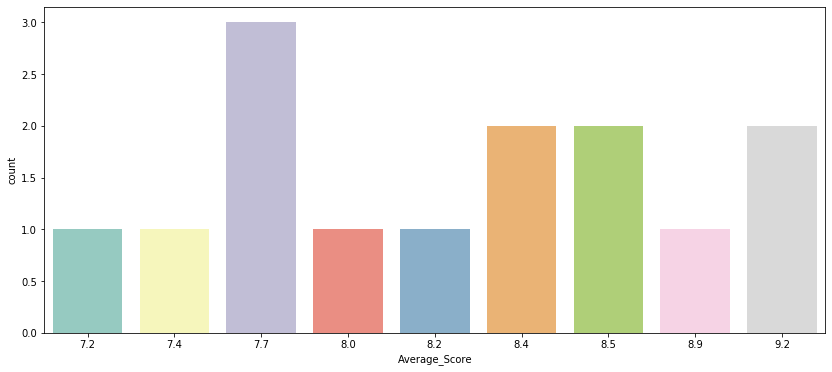

In [579]:
# Plotting the Average scores of the hotels
score_hotel = reviews_df[['Hotel_Name','Average_Score']].drop_duplicates() # Dropping any duplicates
plt.figure(figsize = (14,6))
sns.countplot(x = 'Average_Score',data = score_hotel,palette="Set3")

In [580]:
score_hotel.describe()

,Average_Score
count,14.000000
mean,8.214286
std,0.631064
min,7.200000
25%,7.700000
50%,8.300000
75%,8.500000
max,9.200000


In [581]:
# There are 14 unique average scores
# Minimum Average score is 7.2
# Maximum Average score is 9.2
# 25% of the hotels have an Average_score of 7.2 - 7.7
# 50% of the hotels have an Average_score of 7.8 - 8.3
# 75% of the hotels have an Average_score of 8.5 - 9.2

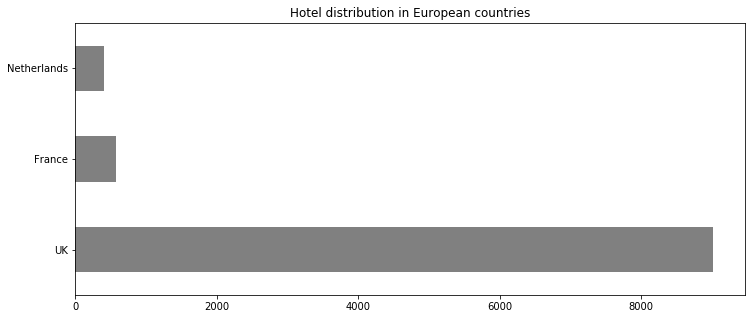

In [582]:
# lets find out hotels are in which European country
reviews_df.Hotel_Address = reviews_df.Hotel_Address.str.replace('United Kingdom','UK') # Replacing 'united kingdom' with 'UK' for easy use
reviews_df['EC'] = reviews_df.Hotel_Address.apply(lambda x: x.split(' ')[-1]) # Splitting the hotel address and picking out the last string which would be the countries
#Plotting with matplotlib 
plt.figure(figsize = (12,5))
plt.title('Hotel distribution in European countries')
reviews_df.EC.value_counts().plot.barh(color = 'gray')

In [583]:
# Lets find the popular hotel by Average_Score and Total_Number_of_Reviews
reviews_df[reviews_df.Average_Score >= 7.7][['Hotel_Name','Average_Score','Total_Number_of_Reviews']].drop_duplicates().sort_values(by ='Total_Number_of_Reviews',ascending = False)

,Hotel_Name,Average_Score,Total_Number_of_Reviews
8301,Grand Royale London Hyde Park,7.7,6539
5257,Park Plaza County Hall London,8.4,6117
2008,The Park Grand London Paddington,7.7,4380
3832,The Principal London,8.0,3150
971,Apex Temple Court Hotel,9.2,2619
405,K K Hotel George,8.5,1831
0,Hotel Arena,7.7,1403
7743,Hotel Trianon Rive Gauche,8.2,967
7961,InterContinental London Park Lane,8.5,510
7616,Splendid Etoile,8.9,486


In [584]:
# Lets find the not so popular hotel by Average_Score and Total_Number_of_Reviews
reviews_df[reviews_df.Average_Score < 7.7][['Hotel_Name','Average_Score','Total_Number_of_Reviews']].drop_duplicates().sort_values(by ='Total_Number_of_Reviews',ascending = False)

,Hotel_Name,Average_Score,Total_Number_of_Reviews
8121,Novotel Suites Paris Nord 18 me,7.4,1082
3813,Kube Hotel Ice Bar,7.2,197


In [585]:
reviews_df['Hotel_Name'].unique()

array(['Hotel Arena', 'K K Hotel George', 'Apex Temple Court Hotel',
       'The Park Grand London Paddington', 'Monhotel Lounge SPA',
       'Kube Hotel Ice Bar', 'The Principal London',
       'Park Plaza County Hall London', 'One Aldwych', 'Splendid Etoile',
       'Hotel Trianon Rive Gauche', 'InterContinental London Park Lane',
       'Novotel Suites Paris Nord 18 me', 'Grand Royale London Hyde Park'],
      dtype=object)

In [586]:
# append positive and negative reviews to a column
reviews_df['reviews'] = reviews_df['Negative_Review'] + reviews_df['Positive_Review']

# create label for reviews (review stars less than 5 is considered negative review)
reviews_df['Score'] = reviews_df['Reviewer_Score'].apply(lambda x: 1 if x<8 else 0)


In [587]:
# Creating a newe dataframe with reviews (positive + negative) and score based on Reviewer_score
hotel_reviews = reviews_df[['reviews','Score']]
hotel_reviews.head()

,reviews,Score
0,I am so angry that i made this post available...,1
1,No Negative No real complaints the hotel was g...,1
2,Rooms are nice but for elderly a bit difficul...,1
3,My room was dirty and I was afraid to walk ba...,1
4,You When I booked with your company on line y...,1


In [588]:
hotel_reviews.tail()

,reviews,Score
9994,No Negative A little gem of a hotel full of hi...,0
9995,No Negative perfect staff,0
9996,Room size The staff are really friendly,1
9997,Room very small Very cramped Friendly,1
9998,No Negative Beds were extra comfy Staff very f...,0


In [589]:
# Count of number of bad_reviews
hotel_reviews['Score'].value_counts()


0    5839
1    4160
Name: Score, dtype: int64

In [592]:
# NLP packages
import nltk # Natural language processing toolkit
import re # for regular expressions
from nltk.corpus import wordnet
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from collections import Counter
from wordcloud import WordCloud

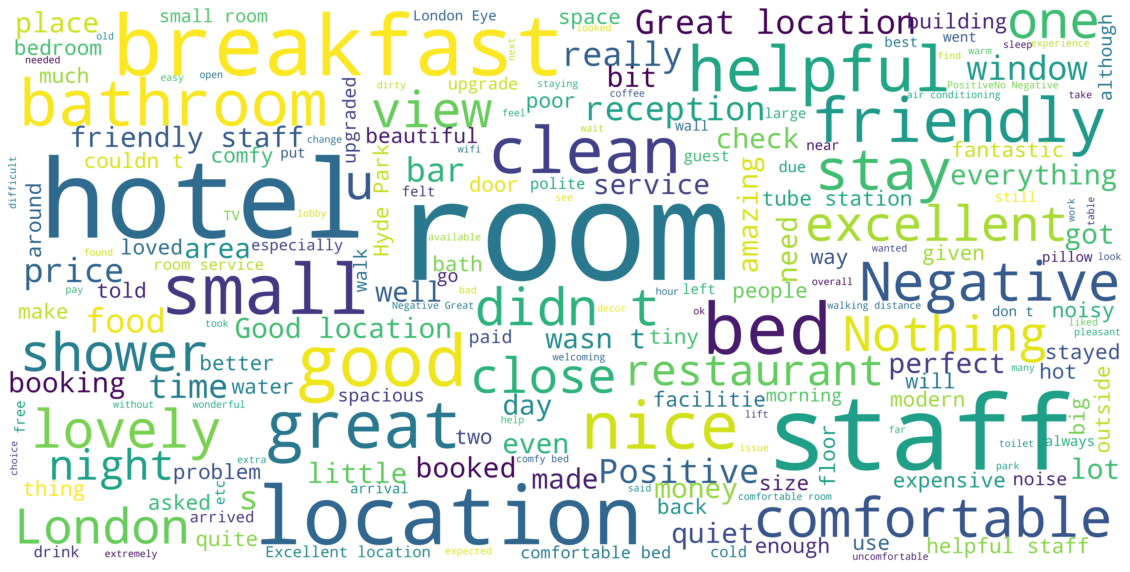

In [593]:
# Text Visualization using wordcloud before preprocessing the data
word_cloud_text = ''.join(hotel_reviews['reviews'])

wordcloud = WordCloud(
    width=800,
    height=400,
    scale=10,
    max_words=200,
    background_color='white',
    max_font_size=100
    ).generate(word_cloud_text)
fig = plt.figure(1, figsize = (20, 20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [594]:
# Many Reviews have text like 'NO NEGATIVE and NO POSITIVE' 
# so replacing them from reviews with a space
hotel_reviews["reviews"] = hotel_reviews["reviews"].apply(lambda x: x.replace("No Negative", "").replace("No Positive", "").replace("No real complaints",""))


In [595]:
# return the wordnet object value corresponding to the POS tag

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    


def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]

    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

In [596]:
# clean text data
hotel_reviews["review_clean"] = hotel_reviews["reviews"].apply(lambda x: clean_text(x))

In [597]:
hotel_reviews.head()

,reviews,Score,review_clean
0,I am so angry that i made this post available...,1,angry make post available via possible site us...
1,the hotel was great great location surroundi...,1,hotel great great location surroundings room a...
2,Rooms are nice but for elderly a bit difficul...,1,room nice elderly bit difficult room two story...
3,My room was dirty and I was afraid to walk ba...,1,room dirty afraid walk barefoot floor look cle...
4,You When I booked with your company on line y...,1,book company line show picture room think get ...


In [598]:
print("- Old Review -")
print(hotel_reviews['reviews'][1])
print("\n- New Review -")
print(hotel_reviews['review_clean'][1])

- Old Review -
  the hotel was great great location surroundings rooms amenities and service Two recommendations however firstly the staff upon check in are very confusing regarding deposit payments and the staff offer you upon checkout to refund your original payment and you can make a new one Bit confusing Secondly the on site restaurant is a bit lacking very well thought out and excellent quality food for anyone of a vegetarian or vegan background but even a wrap or toasted sandwich option would be great Aside from those minor minor things fantastic spot and will be back when i return to Amsterdam 

- New Review -
hotel great great location surroundings room amenity service two recommendation however firstly staff upon check confuse regard deposit payment staff offer upon checkout refund original payment make new one bit confuse secondly site restaurant bit lack well think excellent quality food anyone vegetarian vegan background even wrap toast sandwich option would great aside min

In [599]:
review_backup = hotel_reviews['review_clean'].copy()

In [600]:
# Tokenizing the words from each review:
hotel_reviews['reviews_text_nonstop'] = hotel_reviews['review_clean'].apply(lambda row: nltk.word_tokenize(row))
hotel_reviews[['review_clean','reviews_text_nonstop']]

,review_clean,reviews_text_nonstop
0,angry make post available via possible site us...,"[angry, make, post, available, via, possible, ..."
1,hotel great great location surroundings room a...,"[hotel, great, great, location, surroundings, ..."
2,room nice elderly bit difficult room two story...,"[room, nice, elderly, bit, difficult, room, tw..."
3,room dirty afraid walk barefoot floor look cle...,"[room, dirty, afraid, walk, barefoot, floor, l..."
4,book company line show picture room think get ...,"[book, company, line, show, picture, room, thi..."
...,...,...
9994,little gem hotel full history modern thoroughl...,"[little, gem, hotel, full, history, modern, th..."
9995,perfect staff,"[perfect, staff]"
9996,room size staff really friendly,"[room, size, staff, really, friendly]"
9997,room small cramp friendly,"[room, small, cramp, friendly]"


In [601]:
# Final review of the dataframe
hotel_reviews

,reviews,Score,review_clean,reviews_text_nonstop
0,I am so angry that i made this post available...,1,angry make post available via possible site us...,"[angry, make, post, available, via, possible, ..."
1,the hotel was great great location surroundi...,1,hotel great great location surroundings room a...,"[hotel, great, great, location, surroundings, ..."
2,Rooms are nice but for elderly a bit difficul...,1,room nice elderly bit difficult room two story...,"[room, nice, elderly, bit, difficult, room, tw..."
3,My room was dirty and I was afraid to walk ba...,1,room dirty afraid walk barefoot floor look cle...,"[room, dirty, afraid, walk, barefoot, floor, l..."
4,You When I booked with your company on line y...,1,book company line show picture room think get ...,"[book, company, line, show, picture, room, thi..."
...,...,...,...,...
9994,A little gem of a hotel full of history but m...,0,little gem hotel full history modern thoroughl...,"[little, gem, hotel, full, history, modern, th..."
9995,perfect staff,0,perfect staff,"[perfect, staff]"
9996,Room size The staff are really friendly,1,room size staff really friendly,"[room, size, staff, really, friendly]"
9997,Room very small Very cramped Friendly,1,room small cramp friendly,"[room, small, cramp, friendly]"


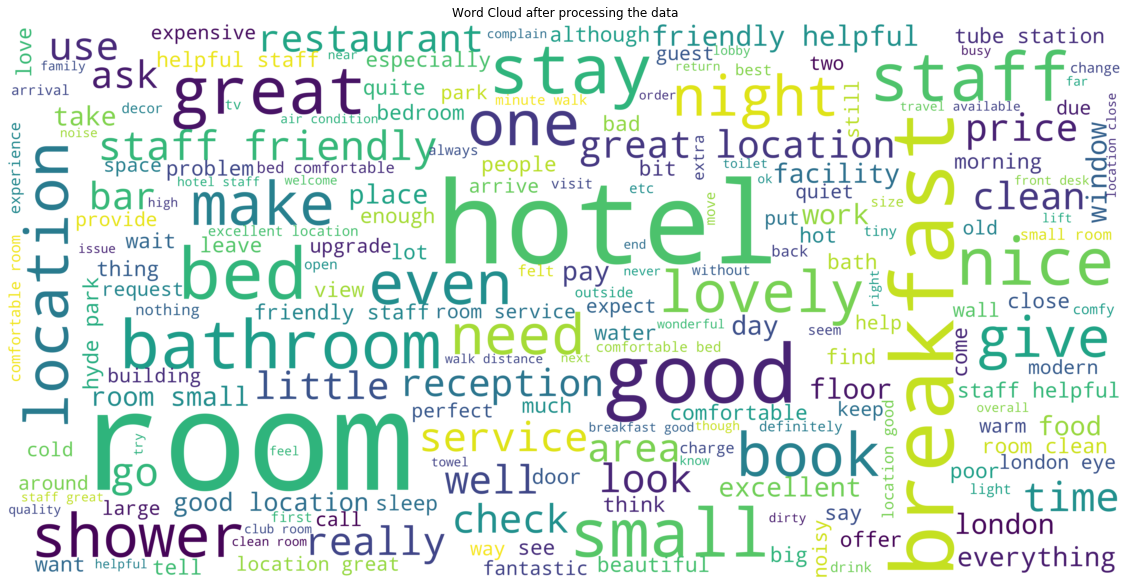

In [602]:
# Text Visualization using wordcloud after preprocessing the data
word_cloud_text = ''.join(hotel_reviews['review_clean'])

wordcloud = WordCloud(
    width=800,
    height=400,
    scale=10,
    max_words=200,
    background_color='white',
    max_font_size=100
    ).generate(word_cloud_text)
fig = plt.figure(1, figsize = (20, 20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('Word Cloud after processing the data')
plt.axis("off")
plt.show()

In [603]:
# creating a object for CountVectorizer
from nltk import ngrams
from sklearn.feature_extraction.text import CountVectorizer

In [604]:
vec_review = CountVectorizer(tokenizer= word_tokenize, ngram_range=(1,1))
bow_review = vec_review.fit_transform(hotel_reviews['review_clean'])
bow_review

<9999x8726 sparse matrix of type '<class 'numpy.int64'>'
	with 181658 stored elements in Compressed Sparse Row format>

In [605]:
X = bow_review
y = hotel_reviews['Score']

In [606]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [607]:
# Number of positive and negative reviews in the test set
y_test.value_counts()/y_test.shape

0    0.570333
1    0.429667
Name: Score, dtype: float64

The above test set have 57% positive and 42% negative reviews.

In [608]:
X_train.shape #(3000, 8726)

(6999, 8726)

In [609]:
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [610]:
# Create a function to fit ML algorithms
def fit_ml_algo(algo, X_train, y_train):
    # algo is algorithms name
    # cv is cross-fold validation
    # One Pass
    model = algo.fit(X_train,y_train)
    
    y_pred = model.predict(X_test)
    
    # Accuracy score 
    acs = round(metrics.accuracy_score(y_test,y_pred)*100,3) 
      
    # Precision Score
    ps = round(metrics.precision_score(y_test, y_pred)*100,3)
    
    # Recall Score
    rs = round(metrics.recall_score(y_test, y_pred)*100,3)
    
    # F1_score
    f1 = round(metrics.f1_score(y_test, y_pred)*100,3)
    
    # AUC score
    AUC = round(metrics.roc_auc_score(y_test, y_pred)*100,3)
    
    return y_pred, acs, rs, f1, ps, AUC

In [611]:
# Logistic Regression
start_time = time.time()
y_pred_log, acs_log, rs_log, f1_log, ps_log, AUC_log= fit_ml_algo(LogisticRegression(),X_train,y_train)

log_time = (time.time()-start_time)
print("Accuracy: %s" %acs_log)
print("Precision score: %s" %ps_log)
print("Recall score: %s" %rs_log)
print("F1 Score: %s" %f1_log)
print("AUC score: %s" %AUC_log)
print("Running Time: %s" %datetime.timedelta(seconds=log_time))

Accuracy: 76.433
Precision score: 76.407
Recall score: 65.322
F1 Score: 70.431
AUC score: 75.063
Running Time: 0:00:00.393363


In [612]:
#Linear Support Vector(SVC)
start_time = time.time()
train_pred_svc, acs_svc, rs_svc, f1_svc, ps_svc ,AUC_svc= fit_ml_algo(LinearSVC(),X_train,y_train)

log_time = (time.time()-start_time)
print("Accuracy: %s" %acs_svc)
print("Precision score: %s" %ps_svc)
print("Recall Score: %s" %rs_svc)
print("F1 Score: %s" %f1_svc)
print("AUC score: %s" %AUC_svc)
print("Running Time: %s" %datetime.timedelta(seconds=log_time))

Accuracy: 73.3
Precision score: 70.608
Recall Score: 64.856
F1 Score: 67.61
AUC score: 72.259
Running Time: 0:00:00.612499


In [613]:
# Decision Tree
start_time = time.time()
train_pred_DT, acs_DT, rs_DT, f1_DT, ps_DT, AUC_DT= fit_ml_algo(DecisionTreeClassifier(),X_train,y_train)

log_time = (time.time()-start_time)
print("Accuracy: %s" %acs_DT)
print("Precision score: %s" %ps_DT)
print("Recall score: %s" %rs_DT)
print("F1 Score: %s" %f1_DT)
print("AUC score: %s" %AUC_DT)
print("Running Time: %s" %datetime.timedelta(seconds=log_time))

Accuracy: 66.533
Precision score: 61.671
Recall score: 58.417
F1 Score: 60.0
AUC score: 65.532
Running Time: 0:00:01.582873


In [614]:
# Random Forest Classifier
start_time = time.time()
train_pred_RF, acs_RF, rs_RF, f1_RF, ps_RF,AUC_RF = fit_ml_algo(RandomForestClassifier(),X_train,y_train)

log_time = (time.time()-start_time)
print("Accuracy: %s" %acs_RF)
print("Precision score: %s" %ps_RF)
print("Recall score: %s" %rs_RF)
print("F1 Score: %s" %f1_RF)
print("AUC score: %s" %AUC_RF)
print("Running Time: %s" %datetime.timedelta(seconds=log_time))

Accuracy: 75.267
Precision score: 76.122
Recall score: 61.831
F1 Score: 68.236
AUC score: 73.61
Running Time: 0:00:22.376373


In [615]:
# Naive Bayes using Multinomial
start_time = time.time()
train_pred_MN, acs_MN, rs_MN, f1_MN, ps_MN ,AUC_MN= fit_ml_algo(MultinomialNB(),X_train.toarray(),y_train)

log_time = (time.time()-start_time)
print("Accuracy: %s" %acs_MN)
print("Precision score: %s" %ps_MN)
print("Recall score: %s" %rs_MN)
print("F1 Score: %s" %f1_MN)
print("AUC score: %s" %AUC_MN)
print("Running Time: %s" %datetime.timedelta(seconds=log_time))

Accuracy: 77.133
Precision score: 76.896
Recall score: 66.874
F1 Score: 71.535
AUC score: 75.868
Running Time: 0:00:02.572253


In [616]:
f1_models = pd.DataFrame({
    'Model':['Logistic Regression', 'Navie Bayes Multinomial','Linear SVC', 'Decison Tree', 
             'Random Forest'],
    'Score':[f1_log, f1_MN, f1_svc, f1_DT, f1_RF]
    })
print('----------F1 Score---------')
f1_models.sort_values(by='Score', ascending=False)

----------F1 Score---------


,Model,Score
1,Navie Bayes Multinomial,71.535
0,Logistic Regression,70.431
4,Random Forest,68.236
2,Linear SVC,67.610
3,Decison Tree,60.000


In [617]:
AUC_models = pd.DataFrame({
    'Model':['Logistic Regression', 'Navie Bayes Multinomial', 'Linear SVC', 'Decison Tree', 'Random Forest'],
    'Score':[AUC_log, AUC_MN, AUC_svc, AUC_DT, AUC_RF]
    })
print('----------AUC SCORE---------')
AUC_models.sort_values(by='Score', ascending=False)

----------AUC SCORE---------


,Model,Score
1,Navie Bayes Multinomial,75.868
0,Logistic Regression,75.063
4,Random Forest,73.610
2,Linear SVC,72.259
3,Decison Tree,65.532


In [618]:
Precision_models = pd.DataFrame({
    'Model':['Logistic Regression', 'Navie Bayes Multinomial', 'Linear SVC', 'Decison Tree', 
             'Random Forest'],
    'Score':[ps_log, ps_MN, ps_svc, ps_DT, ps_RF]
    })
print('----------Precision SCORE---------')
Precision_models.sort_values(by='Score', ascending=False)

----------Precision SCORE---------


,Model,Score
1,Navie Bayes Multinomial,76.896
0,Logistic Regression,76.407
4,Random Forest,76.122
2,Linear SVC,70.608
3,Decison Tree,61.671


In [619]:
Recall_models = pd.DataFrame({
    'Model':['Logistic Regression', 'Navie Bayes Multinomial', 
             'Linear SVC', 'Decison Tree', 'Random Forest'],
    'Score':[rs_log, rs_MN, rs_svc, rs_DT, rs_RF]
    })
print('----------Recall SCORE---------')
Recall_models.sort_values(by='Score', ascending=False)

----------Recall SCORE---------


,Model,Score
1,Navie Bayes Multinomial,66.874
0,Logistic Regression,65.322
2,Linear SVC,64.856
4,Random Forest,61.831
3,Decison Tree,58.417


From the scores above we can say that Navies Bayes model works well with a precision score of 76.8% and a recall score of 66.8%

In [635]:
# Lets test the model built with a new review

text = input()

Hotel had nice ambiance but @ a> worst smell!!! nice location


In [636]:
cleaned_text = clean_text(text)
cleaned_text

'hotel nice ambiance bad smell nice location'

In [637]:
bow_text = vec_review.transform([cleaned_text])
bow_text

<1x8726 sparse matrix of type '<class 'numpy.int64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [638]:
# Best Model
model = LogisticRegression(max_iter=200)
model.fit(X_train,y_train)
y_text = model.predict(bow_text)
print('y_text',y_text)

y_text [1]


In [639]:
# Best Model
model1 = MultinomialNB()
model1.fit(X_train,y_train)
y_text1 = model1.predict(bow_text)
print('y_text',y_text1)

y_text [1]


The text prediction(y_text) with 1 show that the review is a negative review else a positive review

In [640]:
if y_text == 1:
    print('The test review "', text, '" is a negative review')
else:
    print('The test review "', text, '" is a positive review')

The test review " Hotel had nice ambiance but @ a> worst smell!!! nice location " is a negative review


THE END